# Russia-Ukraine War Impact on Energy Commodities

In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
te.login()

In [112]:
commodities = {
    'XB1:COM': 'Gasoline',
    'NG1:COM': 'Natural Gas',
    'CL1:COM': 'Crude Oil'
}

In [114]:
raw_df_22 = te.getHistorical(symbol=list(commodities.keys()), initDate='2022-01-01', output_type='df')
df_22 = pd.DataFrame()
df_22.index.name = 'Date'
for item in commodities:
    comm_data =  raw_df_22.loc[raw_df_22['Symbol'] == item]
    comm_closing_data = comm_data[['Date', 'Close']].rename(columns={'Close': commodities[item]})
    
    comm_closing_data.set_index('Date', inplace=True)
    comm_closing_data.index = pd.to_datetime(comm_closing_data.index, infer_datetime_format=True)
    df_22 = pd.merge(df_22, comm_closing_data, on='Date', how='outer')

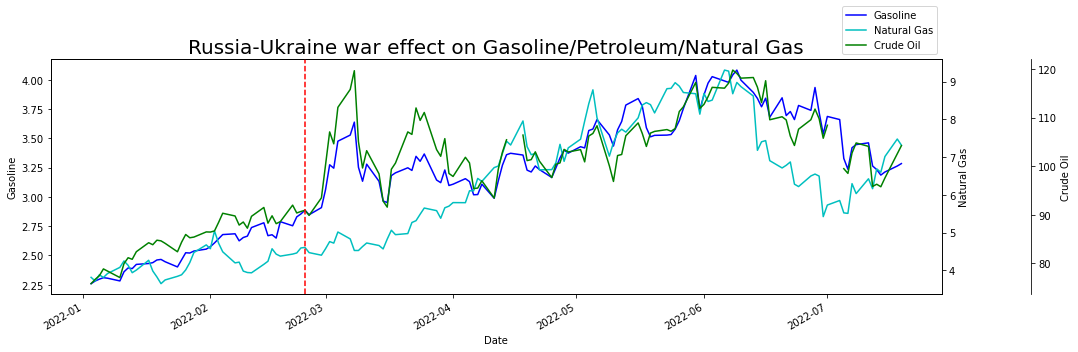

In [116]:
from helper import plot_multi
ax = plot_multi(df_22, figsize=(15, 5))
ax.set_title('Russia-Ukraine war effect on Gasoline/Petroleum/Natural Gas', color='black', size=20)
# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='red', linestyle='--')
plt.tight_layout()